In [ ]:
from matplotlib import colors
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay
from scipy.spatial import SphericalVoronoi
from mpl_toolkits.mplot3d import proj3d
from google.colab import files
import numpy
import scipy
import numpy as np
import scipy as sp
import math
#import stripy
import gdal
#import cartopy
#import cartopy.crs as ccrs
#files.upload()
#!pip install stripy
#!pip install lavavu
#https://hub.mybinder.org/user/underworldcode-stripy-3vdhkjp7/notebooks/Notebooks/0-StartHere.ipynb
#https://pypi.org/project/stripy/
#https://github.com/tylerjereddy/py_sphere_Voronoi
#https://py-sphere-voronoi.readthedocs.io/en/latest/voronoi_utility.html

#https://hub.mybinder.org/user/underworldcode-stripy-3vdhkjp7/notebooks/Notebooks/SphericalTriangulations/Ex2-SphericalGrids.ipynb
#https://hub.mybinder.org/user/underworldcode-stripy-3vdhkjp7/notebooks/Notebooks/SphericalTriangulations/Ex1-Spherical-Triangulations.ipynb
#https://github.com/underworldcode/stripy
files.upload()

Saving 46.xyz to 46 (3).xyz


{'46.xyz': b'46\n\nLA -5.30448249e-02 4.94214912e-01 8.67719925e-01\nLA -5.28250091e-01 -3.34375342e-01 -7.80477400e-01\nLA -4.01480256e-01 -2.93045622e-01 8.67719925e-01\nLA -1.94043445e-02 -3.18730280e-01 -9.47646812e-01\nLA 8.02002635e-01 1.53161483e-01 -5.77350269e-01\nLA 7.93729234e-01 4.66606039e-01 3.90221357e-01\nLA -4.79224465e-01 -6.98567824e-01 5.31363253e-01\nLA -9.90555489e-01 2.72032795e-02 1.34386773e-01\nLA -8.81973868e-01 4.26160007e-01 -2.01270329e-01\nLA 2.68359582e-01 7.71135397e-01 5.77350269e-01\nLA -7.22810050e-01 1.49933893e-01 -6.74585398e-01\nLA -6.97350116e-01 -6.37520678e-01 -3.27521299e-01\nLA 4.54525081e-01 -2.01169290e-01 8.67719925e-01\nLA 1.56156535e-12 -2.86618469e-11 1.00000000e+00\nLA 5.18836476e-01 8.44244578e-01 1.34386773e-01\nLA -8.35947410e-01 -5.20744524e-01 1.73254348e-01\nLA -5.27807502e-01 2.60303080e-01 8.08493381e-01\nLA 4.89332831e-01 3.26943165e-01 8.08493381e-01\nLA 8.44589715e-01 -6.57366481e-02 5.31363253e-01\nLA 7.19215423e-02 -9.768

In [ ]:
def read_points2(filename):   # чтение из файла для Cambrigde Cluster Database
    pts = []
    f = open(filename,'r')
    k = int(f.readline())
    f.readline()
    for s in f:
        l = s.split(' ')
        #print(l)
        pts.append(np.array([float(l[1]), float(l[2]), float(l[3])], dtype=np.float64))
    return pts

In [ ]:
def produce_triangle_vertex_coordinate_array_Delaunay_sphere(hull_instance):
    '''Return shape (N,3,3) numpy array of the Delaunay triangle vertex coordinates on the surface of the sphere.'''
    list_points_vertices_Delaunay_triangulation = [] 
    for simplex in hull_instance.simplices: #for each simplex (face; presumably a triangle) of the convex hull
        convex_hull_triangular_facet_vertex_coordinates = hull_instance.points[simplex]
        assert convex_hull_triangular_facet_vertex_coordinates.shape == (3,3), "Triangular facet of convex hull should be a triangle in 3D space specified by coordinates in a shape (3,3) numpy array."
        list_points_vertices_Delaunay_triangulation.append(convex_hull_triangular_facet_vertex_coordinates)
    array_points_vertices_Delaunay_triangulation = numpy.array(list_points_vertices_Delaunay_triangulation)
    return array_points_vertices_Delaunay_triangulation

def triang(points):
    '''Delaunay tessellation of the points on the surface of the sphere. This is simply the 3D convex hull of the points. Returns a shape (N,3,3) array of points representing the vertices of the Delaunay triangulation on the sphere (i.e., N three-dimensional triangle vertex arrays).'''
    hull = scipy.spatial.ConvexHull(points)
    array_points_vertices_Delaunay_triangulation = produce_triangle_vertex_coordinate_array_Delaunay_sphere(hull)
    return array_points_vertices_Delaunay_triangulation

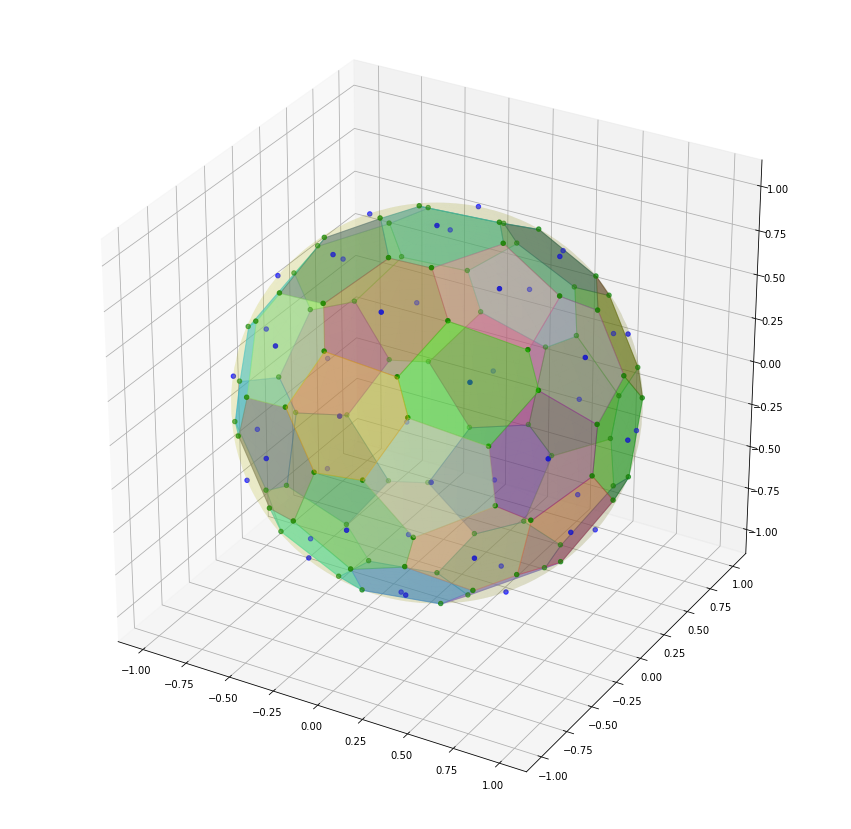

In [ ]:
#center = np.array([0, 0, 0])
#radius = 1
# calculate spherical Voronoi diagram
points = np.array(read_points2('46.xyz'))
sv = SphericalVoronoi(points)#, radius, center)
sv.sort_vertices_of_regions()
triangles = triang(sv.vertices)
'''
>>> fig2 = plt.figure()
>>> fig2.set_size_inches(2,2)
>>> ax = fig2.add_subplot(111, projection='3d')
>>> for triangle_coordinate_array in Delaunay_triangles:
...     m = ax.plot(triangle_coordinate_array[...,0],triangle_coordinate_array[...,1],triangle_coordinate_array[...,2],c='r',alpha=0.1)
...     connecting_array = np.delete(triangle_coordinate_array,1,0)
...     n = ax.plot(connecting_array[...,0],connecting_array[...,1],connecting_array[...,2],c='r',alpha=0.1)
>>> o = ax.scatter(random_coordinate_array[...,0],random_coordinate_array[...,1],random_coordinate_array[...,2],c='k',lw=0,s=0.9)
>>> ax.set_xlim(-1,1);ax.set_ylim(-1,1);ax.set_zlim(-1,1);
(-1, 1)
(-1, 1)
(-1, 1)
>>> ax.set_xticks([-1,1]);ax.set_yticks([-1,1]);ax.set_zticks([-1,1]); 
[<matplotlib.axis.XTick object at 0x...>, <matplotlib.axis.XTick object at 0x...>]
[<matplotlib.axis.XTick object at 0x...>, <matplotlib.axis.XTick object at 0x...>]
[<matplotlib.axis.XTick object at 0x...>, <matplotlib.axis.XTick object at 0x...>]
>>> plt.tick_params(axis='both', which='major', labelsize=6)
'''

# sort vertices (optional, helpful for plotting)
sv.sort_vertices_of_regions()
# generate plot
fig = plt.figure()
fig.set_size_inches(15, 15)
ax = fig.add_subplot(111, projection='3d')
# plot the unit sphere for reference (optional)
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x, y, z, color='y', alpha=0.1)
# plot generator points
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c='b')
# plot Voronoi vertices
ax.scatter(sv.vertices[:, 0], sv.vertices[:, 1], sv.vertices[:, 2], c='g')
# indicate Voronoi regions (as Euclidean polygons)
for region in sv.regions:
    random_color = colors.rgb2hex(np.random.rand(3))
    polygon = Poly3DCollection([sv.vertices[region]], alpha=0.4)
    polygon.set_color(random_color)
    ax.add_collection3d(polygon)
#for triangle in triangles:
#    m = ax.plot(triangle[...,0],triangle[...,1],triangle[...,2],c='r',alpha=0.1)
#    connecting_array = np.delete(triangle,1,0)
#    n = ax.plot(connecting_array[...,0],connecting_array[...,1],connecting_array[...,2],c='r',alpha=1)

plt.show()

In [ ]:
%matplotlib inline
import lavavu

lv = lavavu.Viewer(border=False, resolution=[666,666], background="#FFFFFF")
lv["axis"]=False
lv['specular'] = 0.5

#lat = asin(z / R)
#lon = atan2(y, x)

ModuleNotFoundError: ignored